In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from sklearn import datasets

## Step 1: Import and format the data

In [3]:
iris = datasets.load_iris()

In [4]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

## Step 2: Plot the data to estimate clusters

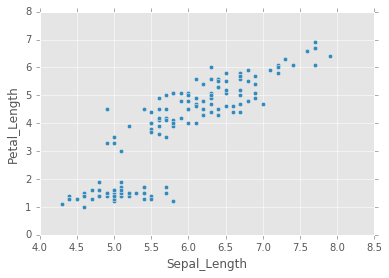

In [9]:
x.plot(kind='scatter',x='Sepal_Length',y='Petal_Length')

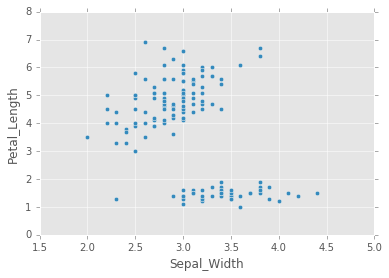

In [11]:
x.plot(kind='scatter',x='Sepal_Width',y='Petal_Length')

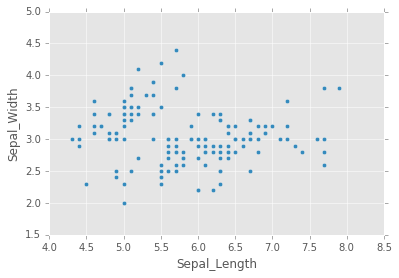

In [12]:
x.plot(kind='scatter',x='Sepal_Length',y='Sepal_Width')

## Step 3: Cluster the data

#### Run the cluster analysis 

In [13]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### Compute the labels and centroids

In [14]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## Step 4: Evaluate the clusters

#### Plot the clusters

In [45]:
for i in range(k):
    ds = iris[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()

TypeError: unhashable type

#### Check the predicted vs actual classifcations

In [35]:
colormap = np.array(['red', 'blue', 'yellow'])

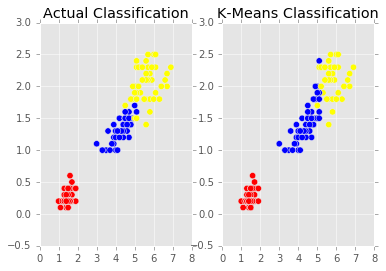

In [36]:
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[labels], s=40)
plt.title('K-Means Classification')

#### Check the centroids

In [37]:
print(centroids)

[[ 5.006       3.418       1.464       0.244     ]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


#### Check the labels

In [38]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [39]:
predY = np.choose(labels, [1, 0, 2]).astype(np.int64)

#### Accuracy Score

In [40]:
metrics.accuracy_score(y, predY)

0.23999999999999999

#### Compute the Silhoutte Score

In [41]:
metrics.silhouette_score(y, predY, metric='euclidean')

0.70172421600536772

#### Calculate the Precision, Recall, and F - Score

In [42]:
print(metrics.classification_report(y, predY))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.95      0.72      0.82        50

avg / total       0.32      0.24      0.27       150



#### Check the Confusion Matrix

In [43]:
print(metrics.confusion_matrix(y, predY))

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]
